In [1]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.stats import binned_statistic_2d
from src.regions import *
from src.pf_stats import *
from src.plotting import *

In [52]:
pf_stats = load_global_pf_stats()
pf_stats = pf_stats[pf_stats['is_complete']]
valid_loc_map = pf_stats['max_precip']>=10
print(valid_loc_map.sum()/valid_loc_map.size)
pf_stats = pf_stats[valid_loc_map]

0.29324191249778275


In [53]:
maxpr = pf_stats['max_precip']
sum(maxpr>=60)/maxpr.size

0.06311401038733495

In [54]:
loc = pf_stats['largest_10mmhr_cluster_rain']/pf_stats['total_precip']
area = pf_stats['num_pixels'] * 25
area_bins = np.logspace(np.log10(100), 4.5, 25)
loc_bins = np.linspace(0, 1, 30)
xx, yy = np.meshgrid(area_bins, loc_bins)

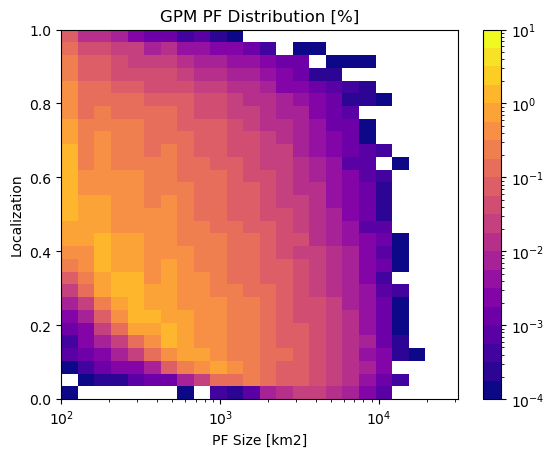

In [55]:
count = binned_statistic_2d(
    loc, 
    area,
    None, 
    'count', 
    bins=[loc_bins, area_bins]
).statistic

fig, ax = plt.subplots()
pdf = 100*count/count.sum()
c = ax.pcolormesh(xx, yy, pdf, cmap=make_discrete_cmap('plasma', 20), norm=colors.LogNorm(vmin=1e-4, vmax=1e1))
ax.set_xscale('log')
cb = plt.colorbar(c)
ax.set_xlabel('PF Size [km2]')
ax.set_ylabel(r'Localization')
ax.set_title('GPM PF Distribution [%]')
save_figure(fig, 'PDF Size and Localization')

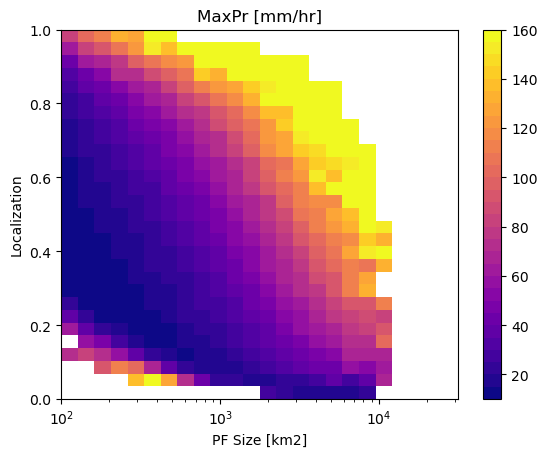

In [62]:
mean = binned_statistic_2d(
    loc, 
    area,
    pf_stats['max_precip'],
    lambda x: np.nanmean(x) if x.size>5 else np.nan, 
    bins=[loc_bins, area_bins]
).statistic

fig, ax = plt.subplots()
c = ax.pcolormesh(xx, yy, mean, cmap=make_discrete_cmap('plasma', 30), norm=colors.Normalize(vmin=10, vmax=160))
ax.set_xscale('log')
cb = plt.colorbar(c)
ax.set_xlabel('PF Size [km2]')
ax.set_ylabel(r'Localization')
ax.set_title('MaxPr [mm/hr]')
save_figure(fig, 'Mean MaxPr Size and Localization')

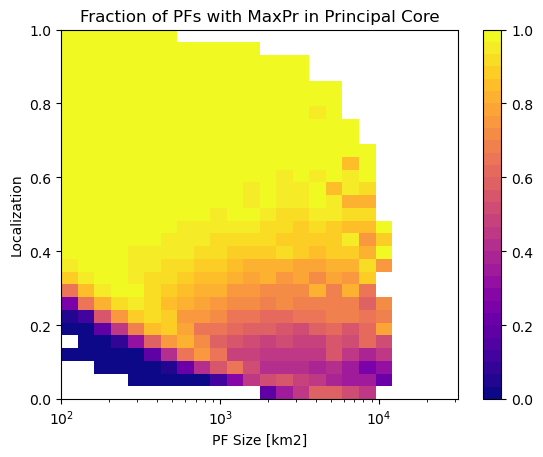

In [57]:
mean = binned_statistic_2d(
    loc, 
    area,
    pf_stats['does_max_precip_occur_in_largest_10mmhr_cluster'],
    lambda x: np.nansum(x)/x.size if x.size>5 else np.nan, 
    bins=[loc_bins, area_bins]
).statistic

fig, ax = plt.subplots()
c = ax.pcolormesh(xx, yy, mean, cmap=make_discrete_cmap('plasma', 30), norm=colors.Normalize(vmin=0, vmax=1))
ax.set_xscale('log')
cb = plt.colorbar(c)
ax.set_xlabel('PF Size [km2]')
ax.set_ylabel(r'Localization')
ax.set_title('Fraction of PFs with MaxPr in Principal Core')
save_figure(fig, 'Fraction of PFs with MaxPr in Principal Core')

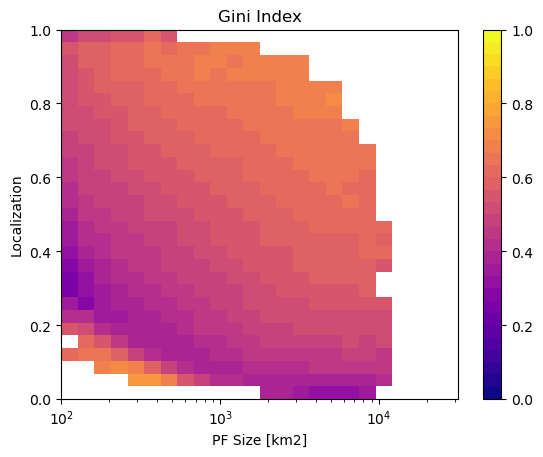

In [58]:
mean = binned_statistic_2d(
    loc, 
    area,
    pf_stats['gini_index'],
    lambda x: np.nanmean(x) if x.size>5 else np.nan, 
    bins=[loc_bins, area_bins]
).statistic

fig, ax = plt.subplots()
c = ax.pcolormesh(xx, yy, mean, cmap=make_discrete_cmap('plasma', 30), norm=colors.Normalize(vmin=0, vmax=1))
ax.set_xscale('log')
cb = plt.colorbar(c)
ax.set_xlabel('PF Size [km2]')
ax.set_ylabel(r'Localization')
ax.set_title('Gini Index')
save_figure(fig, 'Gini Index')

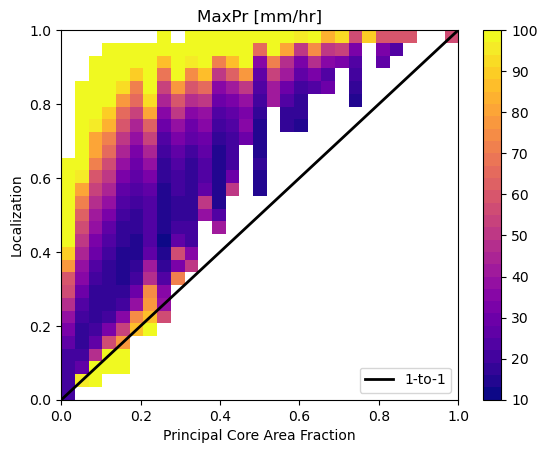

In [66]:
sigma = pf_stats['largest_10mmhr_cluster_size_pixels']/pf_stats['num_pixels']
sigma_bins = loc_bins
mean = binned_statistic_2d(
    loc, 
    sigma,
    pf_stats['max_precip'],
    lambda x: np.nanmean(x) if x.size>5 else np.nan, 
    bins=[loc_bins, sigma_bins]
).statistic

fig, ax = plt.subplots()
XX, YY = np.meshgrid(sigma_bins, loc_bins)
c = ax.pcolormesh(XX, YY, mean, cmap=make_discrete_cmap('plasma', 30), norm=colors.Normalize(vmin=10, vmax=100))
cb = plt.colorbar(c)
ax.set_xlabel('Principal Core Area Fraction')
ax.set_ylabel(r'Localization')
ax.set_title('MaxPr [mm/hr]')
ax.plot([0,1], [0,1], lw=2, color='black', label='1-to-1')
ax.legend(loc='lower right')
save_figure(fig, 'MaxPr Localization and Princial Core Area Fraction')

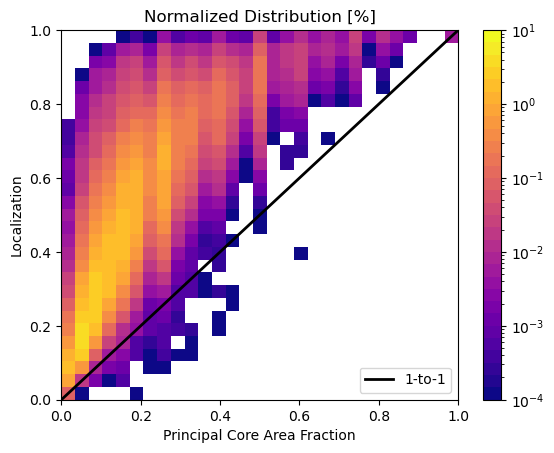

In [67]:
sigma = pf_stats['largest_10mmhr_cluster_size_pixels']/pf_stats['num_pixels']
sigma_bins = loc_bins
count = binned_statistic_2d(
    loc, 
    sigma,
    None,
    'count', 
    bins=[loc_bins, sigma_bins]
).statistic

fig, ax = plt.subplots()
XX, YY = np.meshgrid(sigma_bins, loc_bins)
pdf = 100*count/count.sum()
c = ax.pcolormesh(XX, YY, pdf, cmap=make_discrete_cmap('plasma', 30), norm=colors.LogNorm(vmin=1e-4, vmax=1e1))
cb = plt.colorbar(c)
ax.set_xlabel('Principal Core Area Fraction')
ax.set_ylabel(r'Localization')
ax.set_title('Normalized Distribution [%]')
ax.plot([0,1], [0,1], lw=2, color='black', label='1-to-1')
ax.legend(loc='lower right')
save_figure(fig, 'PDF Localization and Princial Core Area Fraction')

/Users/pedro/miniconda3/envs/extreme_precipitation_in_gpm/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


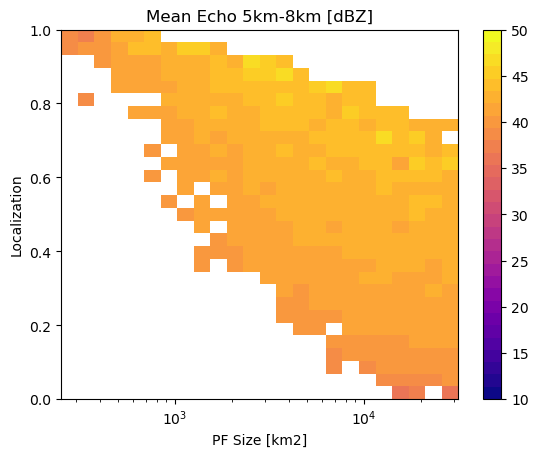

In [33]:
Z = pf_stats['largest_10mmhr_cluster_integrated_radar_10km_to_12km']
mean = binned_statistic_2d(
    loc, 
    area,
    Z,
    lambda x: x.size, 
    bins=[loc_bins, area_bins]
).statistic

fig, ax = plt.subplots()
c = ax.pcolormesh(xx, yy, mean, cmap=make_discrete_cmap('plasma', 30), norm=colors.Normalize(vmin=10, vmax=50))
ax.set_xscale('log')
cb = plt.colorbar(c)
ax.set_xlabel('PF Size [km2]')
ax.set_ylabel(r'Localization')
ax.set_title('Mean Echo 5km-8km [dBZ]')
save_figure(fig, 'Radar 5-8km')